In [105]:
import pandas as pd
import glob
import os
import matplotlib.pyplot as plt

In [165]:
max_length0 = '100mlength'
fold = '*'
path = 'C:/Users/minsu/Desktop/Work/current/mlpractical/semester2/TwitterSA/code/reports/*fold{}.csv'.format(fold)

In [132]:
def read_reports(path, layers, max_length):
    dfs = []
    kernel_sizes = []
    accuracy_values = []
    all_files = glob.glob(path)
    for filename in all_files:
        if layers in filename and max_length in filename:
            dfs.append(pd.read_csv(filename))
            kernel_substring_location = filename.find('kernel')
            kernel_number = filename[kernel_substring_location - 2:kernel_substring_location]
            if not kernel_number.isnumeric:
                kernel_number = kernel_number[1:len(kernel_number)]
            ksize = int(kernel_number)
            kernel_sizes.append(ksize)
    for k in range(len(kernel_sizes)):
        if kernel_sizes[k] < 0:
            kernel_sizes[k] = -kernel_sizes[k]
        accuracy_values.append(dfs[k].loc[3][1])
    sorted_data = sorted(zip(kernel_sizes, accuracy_values), key=lambda x: x[0])
    kernel_sizes, accuracy_values = zip(*sorted_data)
#     print(kernel_sizes, accuracy_values)
    return kernel_sizes, accuracy_values

In [108]:
def read_reports2(path, kernels, max_length, layers=''):
    dfs = []
    layer_sizes = []
    accuracy_values = []
    all_files = glob.glob(path)
    for filename in all_files:
        if kernels in filename and max_length in filename and layers in filename:
            dfs.append(pd.read_csv(filename))
            layer_substring_location = filename.find('cnn')
            layer_number = filename[layer_substring_location - 2:layer_substring_location]
            if not layer_number.isnumeric:
                layer_number = layer_number[1:len(kernel_number)]
            lsize = int(layer_number)
            layer_sizes.append(lsize)
    for k in range(len(layer_sizes)):
        if layer_sizes[k] < 0:
            layer_sizes[k] = -layer_sizes[k]
        accuracy_values.append(dfs[k].loc[3][1])
    sorted_data = sorted(zip(layer_sizes, accuracy_values), key=lambda x: x[0])
    layer_sizes, accuracy_values = zip(*sorted_data)
#     print(layer_sizes, accuracy_values)
    return layer_sizes, accuracy_values

In [128]:
def cal_average(kernel_sizes, accuracy_values):
    identical = 0
    new_kernel_sizes = [kernel_sizes[0]]
    new_accuracy_values = [accuracy_values[0]]
    current_kernel = kernel_sizes[0]
    current_idx = 0
    current_kernel_count = 1
    for i in range(1, len(kernel_sizes)):
        next_kernel = kernel_sizes[i]
        if next_kernel != current_kernel:
            identical = max(identical, current_kernel_count)
            current_kernel = next_kernel
            current_kernel_count = 1
            current_idx += 1
            new_kernel_sizes.append(next_kernel)
            new_accuracy_values.append(accuracy_values[i])
        else:
            past_acc_sum = new_accuracy_values[current_idx] * current_kernel_count
            current_kernel_count += 1
            new_accuracy_values[current_idx] = (past_acc_sum + accuracy_values[i]) / current_kernel_count
    print(len(new_kernel_sizes), len(new_accuracy_values))
    print(new_kernel_sizes, new_accuracy_values)
    print(identical)
    return new_kernel_sizes, new_accuracy_values

In [155]:
layers0 = '4cnn'

kernel_sizes0, accuracy_values0 = read_reports(path, layers0, max_length0)
kernel_sizes0, accuracy_values0 = cal_average(kernel_sizes0, accuracy_values0)

12 12
[2, 3, 4, 5, 6, 8, 10, 12, 14, 16, 18, 20] [0.9710686712718406, 0.9737911418122713, 0.970906135717188, 0.9728159284843558, 0.9693214140593256, 0.9687525396180414, 0.9679804957334415, 0.9651361235270215, 0.9618854124339699, 0.9606257618854125, 0.9535960991466883, 0.9451848841934172]
5


In [156]:
layers1 = '3cnn'

kernel_sizes1, accuracy_values1 = read_reports(path, layers1, max_length0)
kernel_sizes1, accuracy_values1 = cal_average(kernel_sizes1, accuracy_values1)

12 12
[2, 3, 4, 5, 6, 8, 10, 12, 14, 16, 18, 20] [0.9739130434782609, 0.970621698496546, 0.9708248679398619, 0.9704997968305568, 0.9717594473791141, 0.9678179601787891, 0.9628199918732223, 0.9674522551808208, 0.9625761885412434, 0.9572125152377083, 0.9528646891507517, 0.9475822836245429]
5


In [166]:
layers2 = '2cnn'

kernel_sizes2, accuracy_values2 = read_reports(path, layers2, max_length0)
for i in range(len(kernel_sizes2)):
    if kernel_sizes2[i] == 10:
        print(accuracy_values2[i])
# kernel_sizes2, accuracy_values2 = cal_average(kernel_sizes2, accuracy_values2)

0.960178789110118
0.9404713531084924
0.9626168224299064
0.9589597724502236
0.4026818366517676


In [157]:
layers3 = '1cnn'

kernel_sizes3, accuracy_values3 = read_reports(path, layers3, max_length0)
kernel_sizes3, accuracy_values3 = cal_average(kernel_sizes3, accuracy_values3)

1 1
[3] [0.9657456318569686]
0


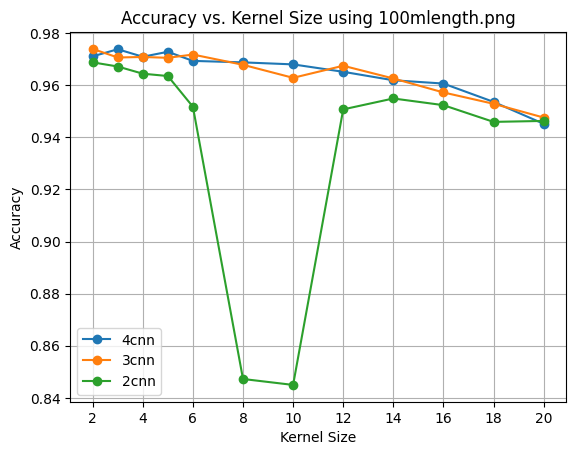

In [159]:
plt.plot(kernel_sizes0, accuracy_values0, '-o', label=layers0)
plt.plot(kernel_sizes1, accuracy_values1, '-o', label=layers1)
plt.plot(kernel_sizes2, accuracy_values2, '-o', label=layers2)
# plt.plot(kernel_sizes2, [accuracy_values3[0] for i in accuracy_values2], '--', label='baseline')
plt.xticks([i for i in range(2, kernel_sizes0[len(kernel_sizes0)-1]+1, 2 if kernel_sizes0[len(kernel_sizes0)-1]>=20 else 1)])
plt.xlabel('Kernel Size')
plt.ylabel('Accuracy')
# plt.title('Accuracy vs. Kernel Size using {0}-fold{1}.png'.format(max_length0, fold if fold != '*' else 'k'))
plt.title('Accuracy vs. Kernel Size using {0}.png'.format(max_length0))
plt.grid(True)
plt.legend()
# plt.savefig('./reports/figures/Accuracy vs. Kernel Size using {0}.png'.format(max_length0))
plt.savefig('./reports/figures/Accuracy vs. Kernel Size using {0}-fold{1}.png'.format(max_length0, fold if fold != '*' else 'k'))
plt.show()